In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv('cs-training.csv',engine='python')
df.head(5)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [223]:
states={"Unnamed: 0":"用户ID",
        "SeriousDlqin2yrs":"好坏客户",
        "RevolvingUtilizationOfUnsecuredLines":"可用额度比值",
        "age":"年龄",
        "NumberOfTime30-59DaysPastDueNotWorse":"逾期30-59天笔数",
        "DebtRatio":"负债率",
        "MonthlyIncome":"月收入",
        "NumberOfOpenCreditLinesAndLoans":"信贷数量",
        "NumberOfTimes90DaysLate":"逾期90天笔数",
        "NumberRealEstateLoansOrLines":"固定资产贷款量",
        "NumberOfTime60-89DaysPastDueNotWorse":"逾期60-89天笔数",
        "NumberOfDependents":"家属数量"}
df.rename(columns=states,inplace=True)

In [224]:
df.head(5)

,用户ID,好坏客户,可用额度比值,年龄,逾期30-59天笔数,负债率,月收入,信贷数量,逾期90天笔数,固定资产贷款量,逾期60-89天笔数,家属数量
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [225]:
df.info()
len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
用户ID          150000 non-null int64
好坏客户          150000 non-null int64
可用额度比值        150000 non-null float64
年龄            150000 non-null int64
逾期30-59天笔数    150000 non-null int64
负债率           150000 non-null float64
月收入           150000 non-null float64
信贷数量          150000 non-null int64
逾期90天笔数       150000 non-null int64
固定资产贷款量       150000 non-null int64
逾期60-89天笔数    150000 non-null int64
家属数量          146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


150000

In [245]:
print('月收入缺失比：{:.2%}'.format(df['月收入'].notnull().sum()/len(df)))
print('家属数量：{:.2%}'.format(df['家属数量'].notnull().sum()/len(df)))

月收入缺失比：100.00%
家属数量：97.38%


D:\Users\lqs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'月收入分布')

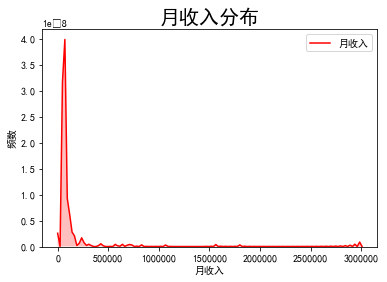

In [246]:
g=sns.kdeplot(df['月收入'],color='red',shade=True)
g.set_xlabel('月收入')
g.set_ylabel('频数')
plt.title('月收入分布',size=20)


In [247]:
df.describe()

,用户ID,好坏客户,可用额度比值,年龄,逾期30-59天笔数,负债率,月收入,信贷数量,逾期90天笔数,固定资产贷款量,逾期60-89天笔数,家属数量
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.288045e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [248]:
df['月收入'][df['月收入']<5000]

1         2600.0
2         3042.0
3         3300.0
5         3500.0
7         3500.0
10        2500.0
14           0.0
18        3280.0
19         333.0
21        3000.0
22        2500.0
24        2416.0
25        4676.0
27        2500.0
28        3400.0
30        4200.0
31         750.0
34        2230.0
36        4000.0
37        3400.0
38        1000.0
39        3500.0
43        3661.0
44           1.0
46        3133.0
47        1937.0
50           0.0
51        3000.0
54        2231.0
57        3216.0
           ...  
149908    4200.0
149909    1732.0
149910    4800.0
149911    3348.0
149913    2155.0
149917    4100.0
149919    3100.0
149929    2500.0
149930    3633.0
149934    2000.0
149936    2423.0
149938    2571.0
149941    3700.0
149949    2904.0
149950       0.0
149951    3100.0
149954     401.0
149956    3500.0
149957    3500.0
149961    1125.0
149962    2944.0
149968    4600.0
149978    2500.0
149982    2760.0
149985    1950.0
149987    3249.0
149990    4335.0
149993     820

In [249]:
df=df.fillna({"月收入":df["月收入"].mean()})

In [250]:
df1=df.dropna()
df1.shape

(146076, 12)

[Text(0,0,'可用额度比值'), Text(0,0,'负债率')]

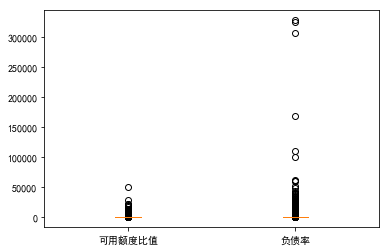

In [251]:
x1=df1["可用额度比值"]
x2=df1["负债率"]
fig=plt.figure(1)
ax=fig.add_subplot(111)
ax.boxplot([x1,x2])
ax.set_xticklabels(["可用额度比值","负债率"])
#可用额度的比值是该客户的可用额度比总额度的比值，
#所以值不应该大于1，大于1的部分进行删除。

In [252]:
plt.rcParams['font.sans-serif']='SimHei'

[Text(0,0,'年')]

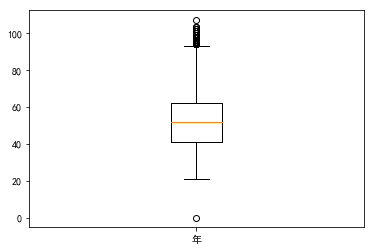

In [253]:
plt.rcParams["font.sans-serif"]='SimHei'
x3=df1["年龄"]
fig=plt.figure(2)
ax1=fig.add_subplot(111)
ax1.boxplot(x3)
ax1.set_xticklabels("年龄")

[Text(0,0,'逾期30-59天笔数'), Text(0,0,'逾期60-89天笔数'), Text(0,0,'逾期90天笔数')]

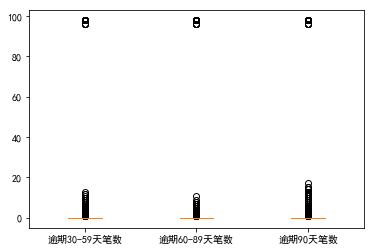

In [254]:
x4=df1["逾期30-59天笔数"]
x5=df1["逾期60-89天笔数"]
x6=df1["逾期90天笔数"]
fig=plt.figure(3)
ax=fig.add_subplot(111)
ax.boxplot([x4,x5,x6])
ax.set_xticklabels(["逾期30-59天笔数","逾期60-89天笔数","逾期90天笔数"])

[Text(0,0,'信贷数量'), Text(0,0,'固定资产贷款量')]

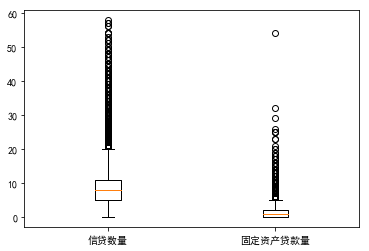

In [255]:
x7=df1["信贷数量"]
x8=df1["固定资产贷款量"]
fig=plt.figure(4)
ax=fig.add_subplot(111)
ax.boxplot([x7,x8])
ax.set_xticklabels(["信贷数量","固定资产贷款量"])

In [258]:
#异常值过滤
df1=df1[df1['可用额度比值']<1]
df1=df1[df1['年龄']>0]
df1=df1[df1['逾期30-59天笔数']<80]
df1=df1[df1['逾期60-89天笔数']<80]
df1=df1[df1['逾期90天笔数']<80]
df1=df1[df1['固定资产贷款量']<50]
df1.columns


Index(['用户ID', '好坏客户', '可用额度比值', '年龄', '逾期30-59天笔数', '负债率', '月收入', '信贷数量',
       '逾期90天笔数', '固定资产贷款量', '逾期60-89天笔数', '家属数量'],
      dtype='object')

In [259]:
df1.shape


(142559, 12)

In [260]:
#单变量分析
age_cut=pd.cut(df1['年龄'],5)
age_cut_group=df1['好坏客户'].groupby(age_cut).count()
age_cut_group

年龄
(20.914, 38.2]    26984
(38.2, 55.4]      56660
(55.4, 72.6]      45709
(72.6, 89.8]      12640
(89.8, 107.0]       566
Name: 好坏客户, dtype: int64

In [261]:
age_cut_grouped1=df1['好坏客户'].groupby(age_cut).sum()

In [262]:
age_cut_grouped1

年龄
(20.914, 38.2]    2478
(38.2, 55.4]      4067
(55.4, 72.6]      1664
(72.6, 89.8]       273
(89.8, 107.0]       12
Name: 好坏客户, dtype: int64

In [263]:
df2=pd.merge(pd.DataFrame(age_cut_group),pd.DataFrame(age_cut_grouped1),left_index=True,right_index=True)
df2.rename(columns={'好坏客户_x':'总客户数','好坏客户_y':'坏客户数'},inplace=True)
df2

,总客户数,坏客户数
年龄,,
"(20.914, 38.2]",26984,2478
"(38.2, 55.4]",56660,4067
"(55.4, 72.6]",45709,1664
"(72.6, 89.8]",12640,273
"(89.8, 107.0]",566,12


In [264]:
df2.insert(2,"好客户数",df2["总客户数"]-df2["坏客户数"])
df2

,总客户数,坏客户数,好客户数
年龄,,,
"(20.914, 38.2]",26984,2478,24506
"(38.2, 55.4]",56660,4067,52593
"(55.4, 72.6]",45709,1664,44045
"(72.6, 89.8]",12640,273,12367
"(89.8, 107.0]",566,12,554


In [265]:
df2.insert(2,"坏客户占比",df2["坏客户数"]/df2["总客户数"])
df2

,总客户数,坏客户数,坏客户占比,好客户数
年龄,,,,
"(20.914, 38.2]",26984,2478,0.091832,24506
"(38.2, 55.4]",56660,4067,0.071779,52593
"(55.4, 72.6]",45709,1664,0.036404,44045
"(72.6, 89.8]",12640,273,0.021598,12367
"(89.8, 107.0]",566,12,0.021201,554


Text(0.5,1,'年龄与好坏客户数分布图')

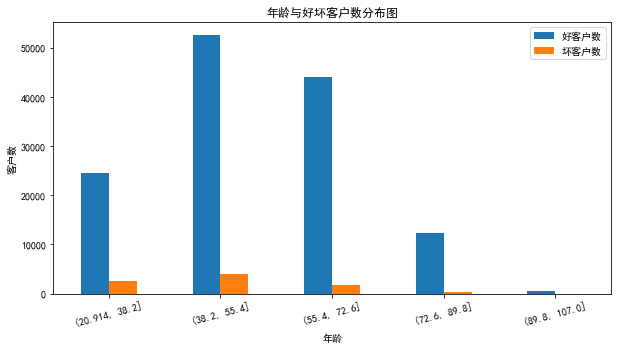

In [266]:
ax1=df2[["好客户数","坏客户数"]].plot.bar(figsize=(10,5))
ax1.set_xticklabels(df2.index,rotation=15)
ax1.set_ylabel("客户数")
ax1.set_title("年龄与好坏客户数分布图")


Text(0.5,1,'坏客户占比分布图')

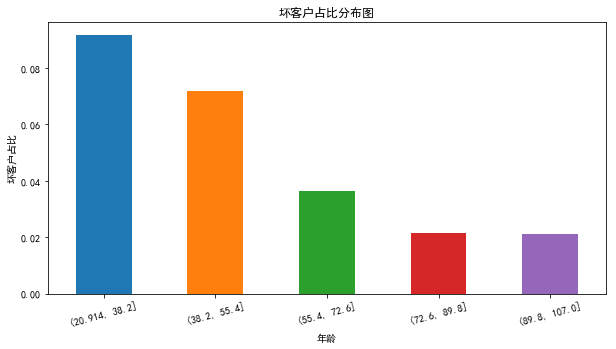

In [267]:
ax2=df2['坏客户占比'].plot.bar(figsize=(10,5))
ax2.set_xticklabels(df2.index,rotation=15)
ax2.set_ylabel("坏客户占比")
ax2.set_title("坏客户占比分布图")


Text(0.5,1,'坏客户率随年龄的变化趋势图')

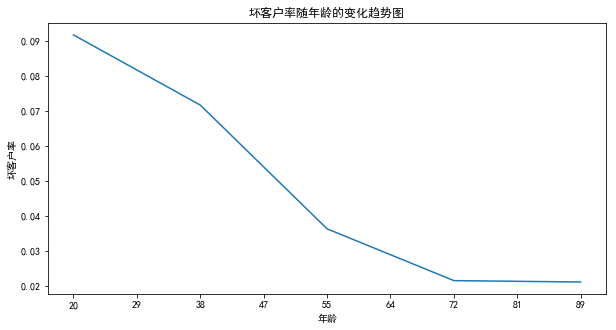

In [268]:
ax11=df2["坏客户占比"].plot(figsize=(10,5))
ax11.set_xticklabels([0,20,29,38,47,55,64,72,81,89,98,107])
ax11.set_ylabel("坏客户率")
ax11.set_title("坏客户率随年龄的变化趋势图")
#可以看出随着年龄的增长，坏客户率在降低，其中38~55之间变化幅度最大


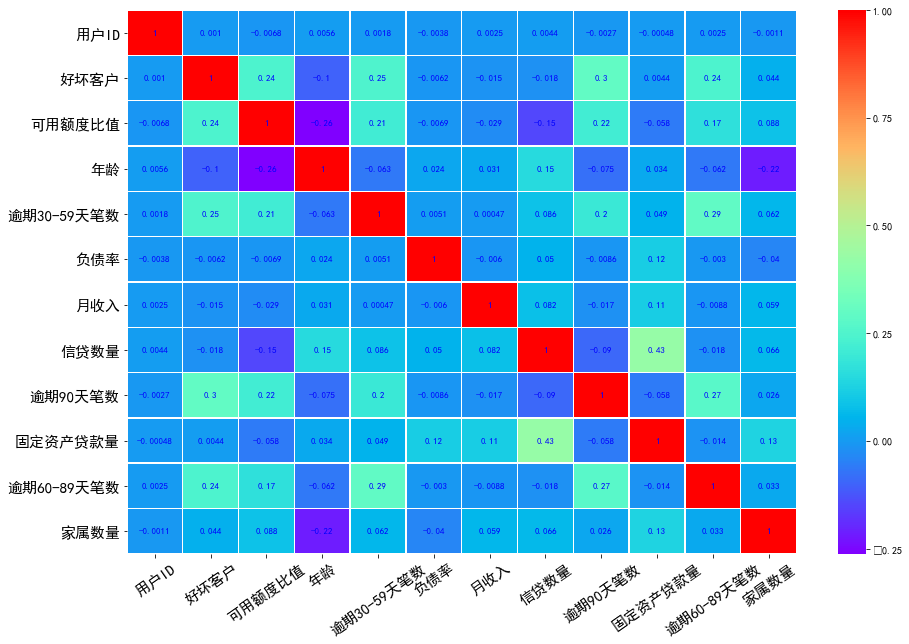

In [269]:
#多变量分析
import seaborn as sns
corr=df1.corr()
xticks = list(corr.index)#x轴标签
yticks = list(corr.index)#y轴标签
fig=plt.figure(figsize=(15,10))
ax1=fig.add_subplot(1,1,1)
sns.heatmap(corr, annot=True, cmap="rainbow",ax=ax1,linewidths=.5, annot_kws={'size': 9, 'weight': 'bold', 'color': 'blue'})
ax1.set_xticklabels(xticks, rotation=35, fontsize=15)
ax1.set_yticklabels(yticks, rotation=0, fontsize=15)
plt.show()
#可以看到各变量之间的相关性比较小，所以不需要操作，一般相关系数大于0.6可以进行变量剔除。

In [270]:
#特征选择
cut1=pd.qcut(df1["可用额度比值"],4,labels=False)
cut2=pd.qcut(df1["年龄"],8,labels=False)
bins3=[-1,0,1,3,5,13]
cut3=pd.cut(df1["逾期30-59天笔数"],bins3,labels=False)
cut4=pd.qcut(df1["负债率"],3,labels=False)
cut5=pd.qcut(df1["月收入"],4,labels=False)
cut6=pd.qcut(df1["信贷数量"],4,labels=False)
bins7=[-1, 0, 1, 3,5, 20]
cut7=pd.cut(df1["逾期90天笔数"],bins7,labels=False)
bins8=[-1, 0,1,2, 3, 33]
cut8=pd.cut(df1["固定资产贷款量"],bins8,labels=False)
bins9=[-1, 0, 1, 3, 12]
cut9=pd.cut(df1["逾期60-89天笔数"],bins9,labels=False)
bins10=[-1, 0, 1, 2, 3, 5, 21]
cut10=pd.cut(df1["家属数量"],bins10,labels=False)


In [271]:
rate=df1["好坏客户"].sum()/(df1["好坏客户"].count()-df1["好坏客户"].sum())
def get_woe_data(cut):
    grouped=df1["好坏客户"].groupby(cut,as_index = True).value_counts()
    woe=np.log(grouped.unstack().iloc[:,1]/grouped.unstack().iloc[:,0]/rate)
    return woe
cut1_woe=get_woe_data(cut1)
cut2_woe=get_woe_data(cut2)
cut3_woe=get_woe_data(cut3)
cut4_woe=get_woe_data(cut4)
cut5_woe=get_woe_data(cut5)
cut6_woe=get_woe_data(cut6)
cut7_woe=get_woe_data(cut7)
cut8_woe=get_woe_data(cut8)
cut9_woe=get_woe_data(cut9)
cut10_woe=get_woe_data(cut10)



In [272]:
grouped=df1["好坏客户"].groupby(cut1,as_index = True).value_counts()
grouped

可用额度比值  好坏客户
0       0       34975
        1         665
1       0       34929
        1         711
2       0       33959
        1        1680
3       0       30202
        1        5438
Name: 好坏客户, dtype: int64

In [273]:
grouped.unstack()

好坏客户,0,1
可用额度比值,,
0,34975,665
1,34929,711
2,33959,1680
3,30202,5438


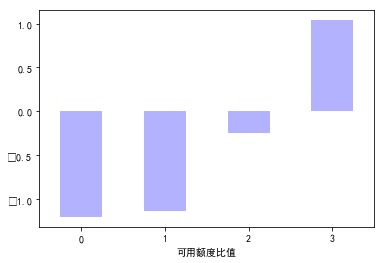

In [274]:
cut1_woe.plot.bar(color='b',alpha=0.3,rot=0)

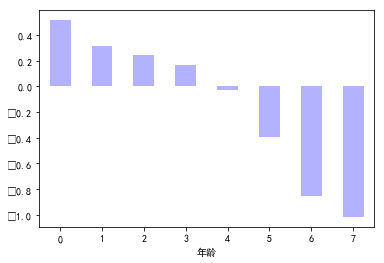

In [275]:
cut2_woe.plot.bar(color='b',alpha=0.3,rot=0)

#可以看出woe值已调整到具有单调性

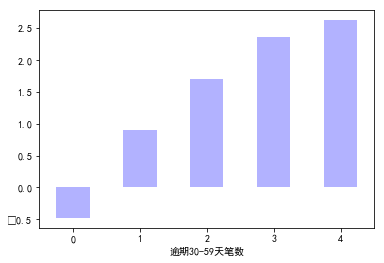

In [276]:
cut3_woe.plot.bar(color='b',alpha=0.3,rot=0)

Text(0,0.5,'IV')

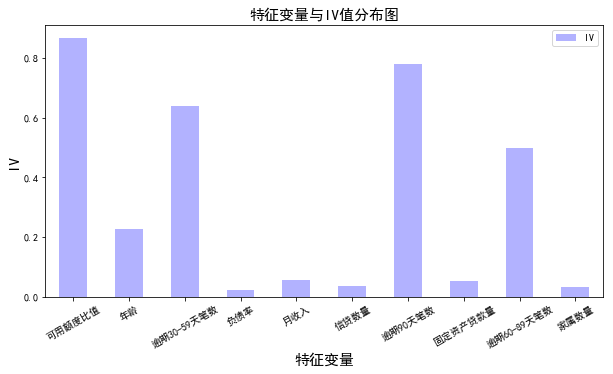

In [277]:
#IV值计算
def get_IV_data(cut,cut_woe):
    grouped=df1["好坏客户"].groupby(cut,as_index = True).value_counts()
    cut_IV=((grouped.unstack().iloc[:,1]/df1["好坏客户"].sum()-grouped.unstack().iloc[:,0]/(df1["好坏客户"].count()-df1["好坏客户"].sum()))*cut_woe).sum()    
    return cut_IV
#计算各分组的IV值
cut1_IV=get_IV_data(cut1,cut1_woe)
cut2_IV=get_IV_data(cut2,cut2_woe)
cut3_IV=get_IV_data(cut3,cut3_woe)
cut4_IV=get_IV_data(cut4,cut4_woe)
cut5_IV=get_IV_data(cut5,cut5_woe)
cut6_IV=get_IV_data(cut6,cut6_woe)
cut7_IV=get_IV_data(cut7,cut7_woe)
cut8_IV=get_IV_data(cut8,cut8_woe)
cut9_IV=get_IV_data(cut9,cut9_woe)
cut10_IV=get_IV_data(cut10,cut10_woe)
IV=pd.DataFrame([cut1_IV,cut2_IV,cut3_IV,cut4_IV,cut5_IV,cut6_IV,cut7_IV,cut8_IV,cut9_IV,cut10_IV],index=['可用额度比值','年龄','逾期30-59天笔数','负债率','月收入','信贷数量','逾期90天笔数','固定资产贷款量','逾期60-89天笔数','家属数量'],columns=['IV'])
iv=IV.plot.bar(color='b',alpha=0.3,rot=30,figsize=(10,5),fontsize=(10))
iv.set_title('特征变量与IV值分布图',fontsize=(15))
iv.set_xlabel('特征变量',fontsize=(15))
iv.set_ylabel('IV',fontsize=(15))



In [278]:
IV

,IV
可用额度比值,0.867677
年龄,0.226285
逾期30-59天笔数,0.638915
负债率,0.021881
月收入,0.056417
信贷数量,0.035331
逾期90天笔数,0.780782
固定资产贷款量,0.052406
逾期60-89天笔数,0.497545
家属数量,0.033580


In [279]:
#WOE值替换
df_new=pd.DataFrame()#新建df_new存放转换都的数据
def replace_data(cut,cut_woe):
    a=[]
    for i in cut.unique():
        a.append(i)
        a.sort()
        for m in range(len(a)):
            cut.replace(a[m],cut_woe.values[m],inplace=True)
    return cut
df_new["好坏客户"]=df1["好坏客户"]
df_new["可用额度比值"]=replace_data(cut1,cut1_woe)
df_new["年龄"]=replace_data(cut2,cut2_woe)
df_new["逾期30-59天笔数"]=replace_data(cut3,cut3_woe)
df_new["负债率"]=replace_data(cut4,cut4_woe)
df_new["月收入"]=replace_data(cut5,cut5_woe)
df_new["信贷数量"]=replace_data(cut6,cut6_woe)
df_new["逾期90天笔数"]=replace_data(cut7,cut7_woe)
df_new["固定资产贷款量"]=replace_data(cut8,cut8_woe)
df_new["逾期60-89天笔数"]=replace_data(cut9,cut9_woe)
df_new["家属数量"]=replace_data(cut10,cut10_woe)
df_new.head()


,好坏客户,可用额度比值,年龄,逾期30-59天笔数,负债率,月收入,信贷数量,逾期90天笔数,固定资产贷款量,逾期60-89天笔数,家属数量
0,1,-1.203637,0.518166,-0.476517,-0.151014,0.289489,0.222781,-0.345338,0.197418,-0.244603,-0.150675
1,0,-1.203637,0.518166,-0.476517,-0.151014,0.289489,0.222781,-0.345338,0.197418,-0.244603,-0.150675
2,0,-1.203637,0.518166,0.899640,-0.151014,0.289489,0.222781,1.990279,0.197418,-0.244603,-0.150675
3,0,-1.203637,0.518166,-0.476517,-0.151014,0.289489,0.222781,-0.345338,0.197418,-0.244603,-0.150675
4,0,-1.203637,0.166515,0.899640,-0.151014,0.289489,-0.255957,-0.345338,-0.235787,-0.244603,-0.150675


In [280]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
x=df_new.iloc[:,1:]
y=df_new.iloc[:,:1]
x_train ,x_test,y_train,y_test=train_test_split(x,y,test_size=0.6,random_state=0)
model=LogisticRegression()
clf=model.fit(x_train,y_train)
print('测试成绩:{}'.format(clf.score(x_test,y_test)))

D:\Users\lqs\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


测试成绩:0.9414398615787505


In [281]:
coe=clf.coef_        #特征权值系数，后面转换为打分规则时会用到
coe

array([[-3.98076846,  0.74786732,  0.51198519, -0.00484713, -0.02022784,
         0.54568818,  0.76249928,  0.31508342,  0.65523171,  0.33313069]])

In [282]:
y_pred=clf.predict(x_test)
y_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [283]:
#模型评估
#模型评估主要看AUC和K-S值
from sklearn.metrics import roc_curve,auc


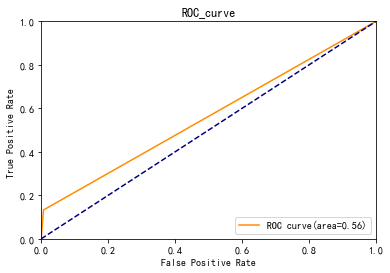

In [284]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,color='darkorange',label='ROC curve(area=%0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate ')
plt.title('ROC_curve')
plt.legend(loc='lower right')
plt.show()

In [285]:
roc_auc

0.5628380013210068

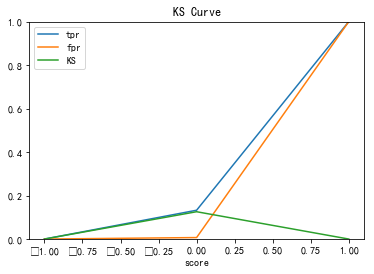

<Figure size 1440x1440 with 0 Axes>

In [286]:
fig, ax = plt.subplots()
ax.plot(1 - threshold, tpr, label='tpr') # ks曲线要按照预测概率降序排列，所以需要1-threshold镜像
ax.plot(1 - threshold, fpr, label='fpr')
ax.plot(1 - threshold, tpr-fpr,label='KS')
plt.xlabel('score')
plt.title('KS Curve')
plt.ylim([0.0, 1.0])
plt.figure(figsize=(20,20))
legend = ax.legend(loc='upper left')
plt.show()


In [287]:
max(tpr-fpr)

0.12567600264201365

In [288]:
x1 = get_score(coe[0][0], cut1_woe, factor)
x2 = get_score(coe[0][1], cut2_woe, factor)
x3 = get_score(coe[0][2], cut3_woe, factor)
x4 = get_score(coe[0][3], cut4_woe, factor)
x5 = get_score(coe[0][4], cut5_woe, factor)
x6 = get_score(coe[0][5], cut6_woe, factor)
x7 = get_score(coe[0][6], cut7_woe, factor)
x8 = get_score(coe[0][7], cut8_woe, factor)
x9 = get_score(coe[0][8], cut9_woe, factor)
x10 = get_score(coe[0][9], cut10_woe, factor)
print("可用额度比值对应的分数:{}".format(x1))
print("年龄对应的分数:{}".format(x2))
print("逾期30-59天笔数对应的分数:{}".format(x3))
print("负债率对应的分数:{}".format(x4))
print("月收入对应的分数:{}".format(x5))
print("信贷数量对应的分数:{}".format(x6))
print("逾期90天笔数对应的分数:{}".format(x7))
print("固定资产贷款量对应的分数:{}".format(x8))
print("逾期60-89天笔数对应的分数:{}".format(x9))
print("家属数量对应的分数:{}".format(x10))

可用额度比值对应的分数:[138.0, 130.0, 28.0, -120.0]
年龄对应的分数:[11.0, 7.0, 5.0, 4.0, -1.0, -9.0, -18.0, -22.0]
逾期30-59天笔数对应的分数:[-7.0, 13.0, 25.0, 35.0, 39.0]
负债率对应的分数:[0.0, 0.0, -0.0]
月收入对应的分数:[-0.0, -0.0, 0.0, 0.0]
信贷数量对应的分数:[4.0, -4.0, -2.0, 1.0]
逾期90天笔数对应的分数:[-8.0, 44.0, 61.0, 72.0, 73.0]
固定资产贷款量对应的分数:[2.0, -2.0, -1.0, 1.0, 6.0]
逾期60-89天笔数对应的分数:[-5.0, 35.0, 51.0, 56.0]
家属数量对应的分数:[-1.0, 1.0, 2.0, 3.0, 4.0, 7.0]


In [ ]:

#计算用户总分
def compute_score(series,bins,score):
    list = []
    i = 0
    while i < len(series):
        value = series[i]
        j = len(bins) - 2
        m = len(bins) - 2
        while j >= 0:
            if value >= bins[j]:
                j = -1
            else:
                j -= 1
                m -= 1
        list.append(score[m])
        i += 1
    return list
path2='cs-test.csv'
test1 = pd.read_csv(path2)
test1['x1'] = pd.Series(compute_score(test1['RevolvingUtilizationOfUnsecuredLines'], bins1, x1))
test1['x2'] = pd.Series(compute_score(test1['age'], bins2, x2))
test1['x3'] = pd.Series(compute_score(test1['NumberOfTime30-59DaysPastDueNotWorse'], bins3, x3))
test1['x4'] = pd.Series(compute_score(test1['DebtRatio'], bins4, x4))
test1['x5'] = pd.Series(compute_score(test1['MonthlyIncome'], bins5, x5))
test1['x6'] = pd.Series(compute_score(test1['NumberOfOpenCreditLinesAndLoans'], bins6, x6))
test1['x7'] = pd.Series(compute_score(test1['NumberOfTimes90DaysLate'], bins7, x7))
test1['x8'] = pd.Series(compute_score(test1['NumberRealEstateLoansOrLines'], bins8, x8))
test1['x9'] = pd.Series(compute_score(test1['NumberOfTime60-89DaysPastDueNotWorse'], bins9, x9))
test1['x10'] = pd.Series(compute_score(test1['NumberOfDependents'], bins10, x10))
test1['Score'] = test1['x1']+test1['x2']+test1['x3']+test1['x4']+test1['x5']+test1['x6']+test1['x7']+test1['x8']+test1['x9']+test1['x10']+600
test1.to_csv('ScoreData.csv', index=False)